## Set Up the Environment

In [33]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Mengatur gaya visualisasi
sns.set(style="whitegrid")


In [34]:
# Mendefinisikan ticker saham yang akan dianalisis
ticker = "AAPL"  # Apple Inc.

# Mengunduh data saham
data = yf.download(ticker, start="2015-01-01", end="2023-01-01")

# Menampilkan data yang diunduh
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402172,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714718,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716953,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049517,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973560,237458000


              Open         High          Low        Close    Adj Close  \
count  2014.000000  2014.000000  2014.000000  2014.000000  2014.000000   
mean     72.995713    73.831312    72.182233    73.038039    70.810326   
std      48.953033    49.604854    48.304993    48.976245    49.100044   
min      22.500000    22.917500    22.367500    22.584999    20.744019   
25%      32.328125    32.642502    32.080626    32.348750    29.166344   
50%      48.039999    48.582500    47.775000    48.165001    45.990999   
75%     123.727501   125.130001   122.192499   123.697500   121.418728   
max     182.630005   182.940002   179.119995   182.009995   179.481110   

             Volume  
count  2.014000e+03  
mean   1.317725e+08  
std    6.786645e+07  
min    3.519590e+07  
25%    8.628720e+07  
50%    1.121376e+08  
75%    1.565594e+08  
max    6.488252e+08  


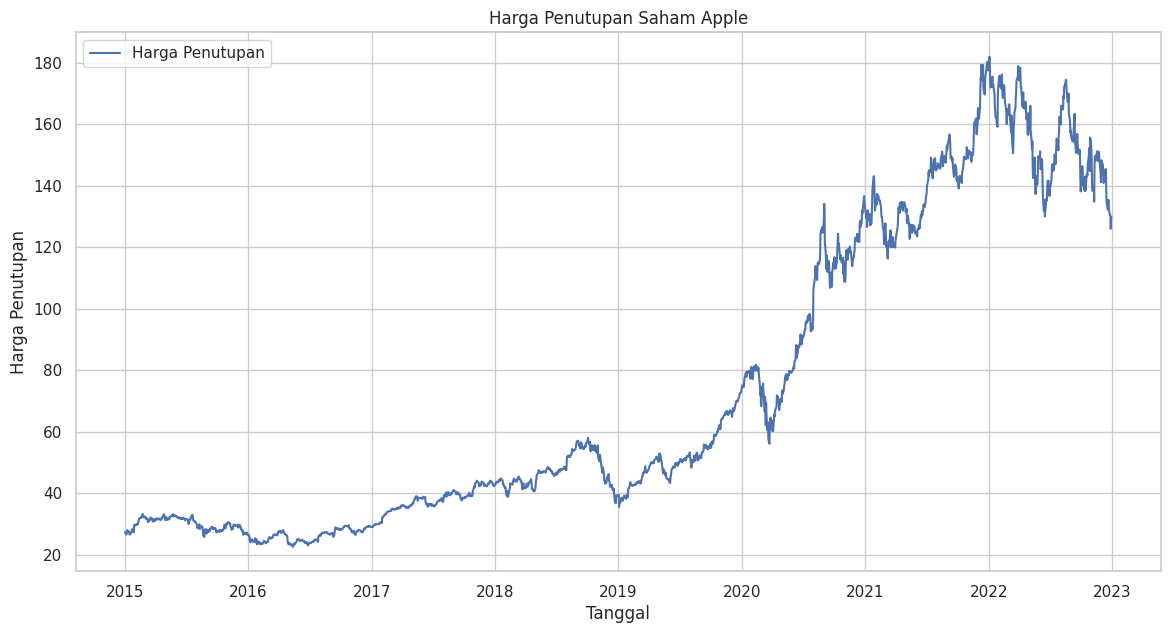

In [35]:
# Menampilkan ringkasan statistik
print(data.describe())

# Memvisualisasikan harga penutupan
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Harga Penutupan')
plt.title('Harga Penutupan Saham Apple')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()


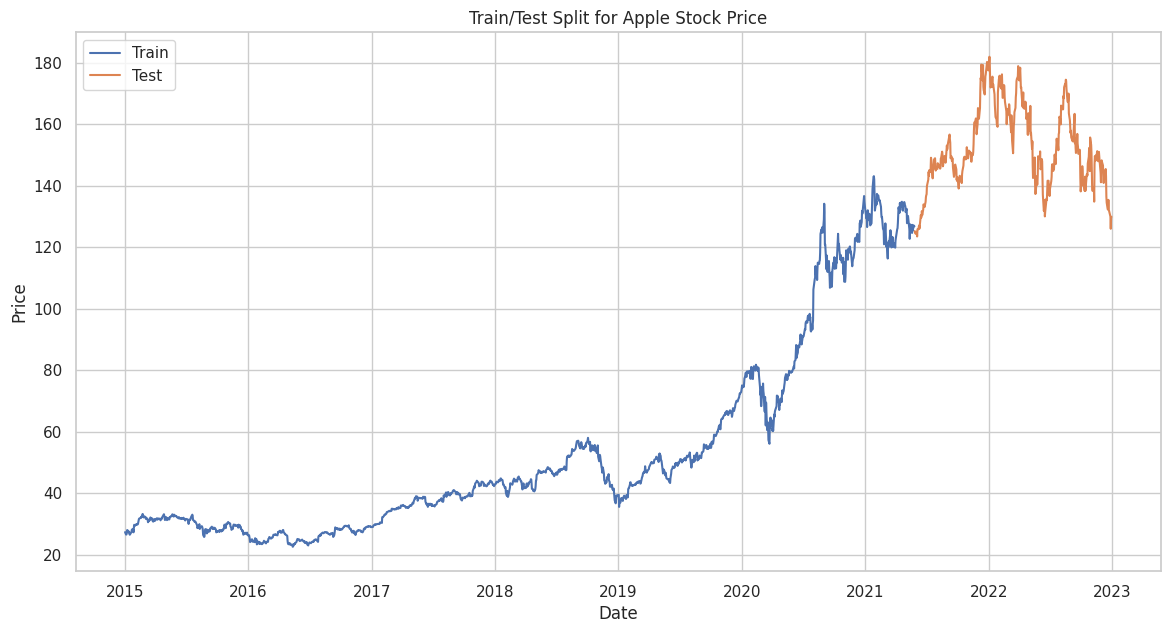

In [36]:
# Membagi data menjadi set pelatihan dan set pengujian
train_data, test_data = data['Close'][:int(len(data)*0.8)], data['Close'][int(len(data)*0.8):]

plt.figure(figsize=(14, 7))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.title('Train/Test Split for Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

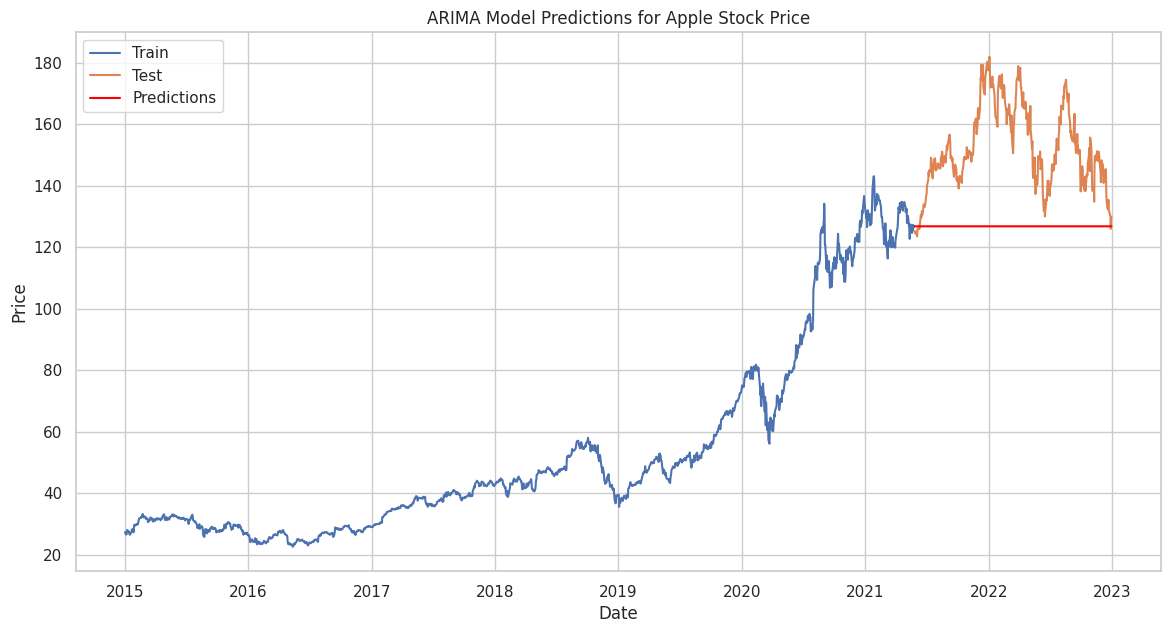

In [37]:
# Membangun model ARIMA
model = ARIMA(train_data, order=(5, 1, 0))  # (p, d, q)
model_fit = model.fit()

# Melakukan prediksi
predictions = model_fit.forecast(steps=len(test_data))

# Memvisualisasikan prediksi
plt.figure(figsize=(14, 7))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions', color='red')
plt.title('ARIMA Model Predictions for Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [38]:
# Mengevaluasi model
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 843.5399146426925


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


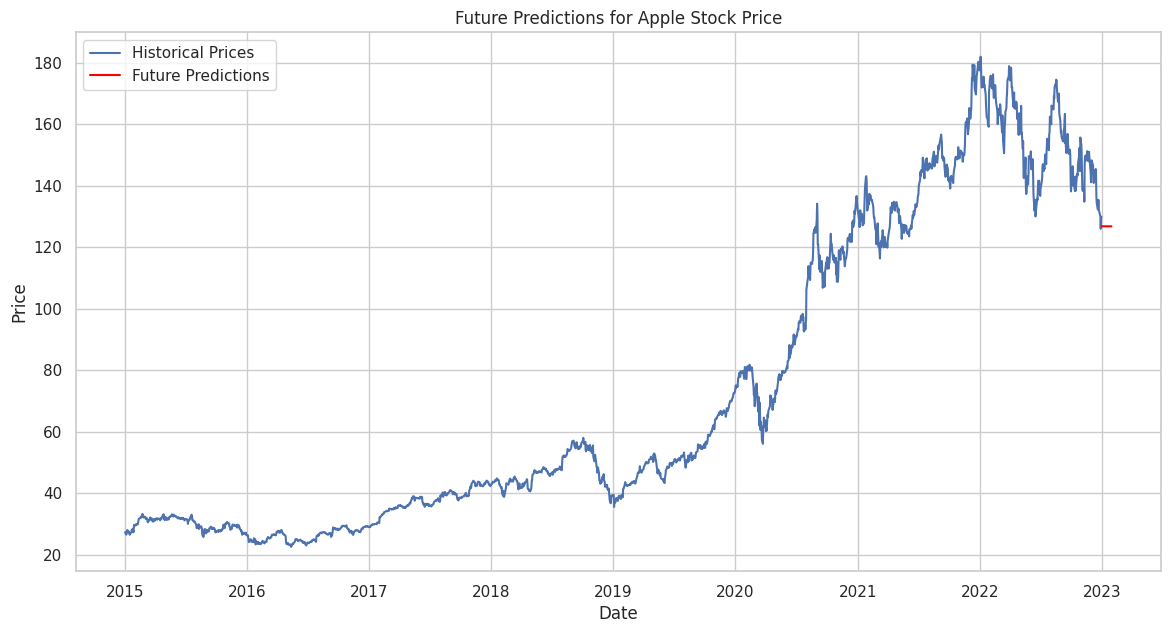

In [41]:
# Menggunakan model untuk memprediksi harga saham masa depan
future_steps = 30
future_predictions = model_fit.forecast(steps=future_steps)

# Membuat indeks tanggal untuk prediksi masa depan
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1)[1:]  # Removed 'closed' argument

# Memvisualisasikan prediksi masa depan
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Prices')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')
plt.title('Future Predictions for Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()